# Statistiques dans le temps

## Paquets utilisés

In [390]:
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as ipw
import datetime
from wordcloud import WordCloud
from typing import List

## Regroupement des mots par années

In [391]:
songs = pd.read_json("./datas/songs.json")

songs["year"] = songs["date"].map(lambda x: datetime.datetime.strptime(x, "%Y-%m-%dT%H:%M:%S").year)

songs.sort_values("year", ascending=False, inplace=True)

songs["words"] = songs["lyrics_keywords"].map(lambda x: x.split(" "))

songs = songs.groupby("year")["lyrics_keywords"].apply(list)
songs = songs.reset_index()

def split_keyword(keywords_list: List[str]):
    return [keywords.split(" ") for keywords in keywords_list]
songs["lyrics_keywords"] = songs["lyrics_keywords"].apply(split_keyword)

songs["songs_count"] = songs["lyrics_keywords"].map(lambda x: len(x))

songs = songs[songs["year"] > 1900]

songs

,year,lyrics_keywords,songs_count
2,1998,"[[boom, boom, bang, bad, boy, pose, ton, gun, ...",7
3,2000,"[[hauts-de-seine, alors, comme, ça, on, veut, ...",7
4,2001,"[[ta-ya, pa, pa-ya, hey, yo, déséquilibre, ta-...",4
5,2004,"[[profonde, écriture, comme, faire, un, massag...",6
6,2005,"[[garde, la, pêche, les, mcs, sont, fauchés, p...",2
7,2006,"[[boulouloubi, boulouloubi, bordel, quand, on,...",13
8,2009,"[[putain, plus, avance, plus, grandis, plus, c...",22
9,2011,"[[laisser, la, trace, un, passage, éphémère, d...",21
10,2012,"[[hé, mais, pourquoi, quand, es, petit, que, e...",30
11,2013,"[[donne-moi, un, faible, te, ferai, un, fort, ...",7


<AxesSubplot:xlabel='year'>

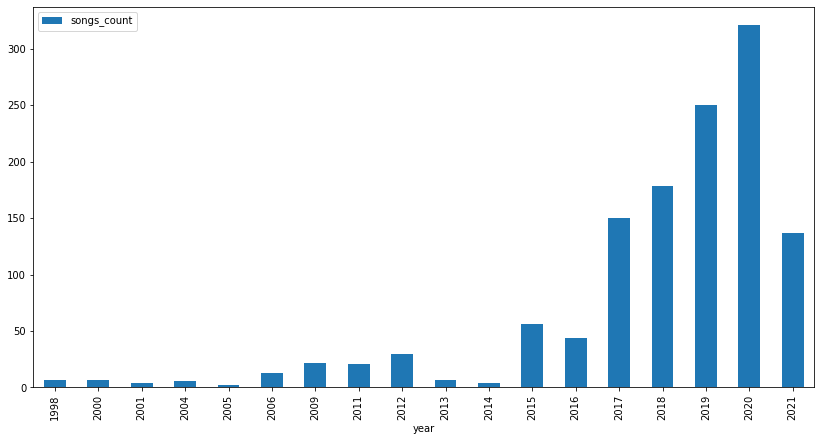

In [392]:
songs.plot(kind="bar", x="year", y="songs_count", figsize=(14, 7))

## Affichages de l'utilisation d'un mot par années

In [393]:
# Textbox creation
word_textbox = ipw.Text(value="", placeholder="Search word", description="Word to count:", disabled=False)

songs_count: pd.DataFrame
searched_word: str

# Here we calculate, for each songs, the percentage of usage of the word
def percentage_usage_per_song(word: str, words: List[List[str]]):
    words_list = pd.Series(words)

    def count_percentage(words: List[str]):
        words = pd.Series(words)
        return len(words[words == word]) / len(words) * 100

    percentage_usage_per_song = words_list.map(count_percentage)

    return percentage_usage_per_song

# We want to count how many songs use the word
def count_songs(percentage_usage_per_song: pd.Series):
    return len(percentage_usage_per_song[percentage_usage_per_song > 0])

# Function called when the button is clicked
def textbox_changed(word: str):
    searched_word = word
    word_searched = word.lower().strip()

    songs_count = songs

    songs_count["percentage_usage_per_song"] = songs_count["lyrics_keywords"].map(lambda x: percentage_usage_per_song(word, x))

    # We want to calculate the average of the percentage of usage for each years
    songs_count["average_usage"] = songs_count["percentage_usage_per_song"].map(lambda x: x.mean())
    songs_count["number_of_songs"] = songs_count["percentage_usage_per_song"].map(count_songs)

    fig, axes = plt.subplots(nrows=1, ncols=2)
    
    songs_count.plot.bar(
        x="year",
        y="number_of_songs",
        figsize=(25, 5),
        ax=axes[0],
        xlabel="Année",
        label="Nombre de musiques utilisant le mot"
    )

    songs_count.plot.bar(
        x="year",
        y="average_usage",
        figsize=(25, 5),
        ax=axes[1],
        color=(1, 0, 0),
        xlabel="Année",
        label="Moyenne du pourcentage d'utilisation du mot"
    )

# Button interaction
ipw.interact_manual(textbox_changed, word=word_textbox.value)

interactive(children=(Text(value='', description='word'), Button(description='Run Interact', style=ButtonStyle…

<function __main__.textbox_changed(word: str)>